### What is Customer Churn?

![Churn](https://media.licdn.com/dms/image/v2/D4D12AQEVyfblBXjyJQ/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1664222940349?e=2147483647&v=beta&t=3CyUZB2EBfKYgRLkoggeC3S3hjaHDOo9a54pZZHqLO0)

**Customer churn** refers to when a customer stops doing business with a company or service.  In subscription-based businesses, churn can severely impact revenue and growth. 
 
**Churn analysis** helps companies understand which customers are likely to leave and why — enabling proactive strategies to retain them.

---

### Dataset Used

We are using the **Telco Customer Churn dataset**, downloaded from [kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data) .

---

### Column Descriptions

| Column Name         | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| `customerID`        | Unique identifier for each customer (to be dropped)                         |
| `gender`            | Whether the customer is Male or Female                                      |
| `SeniorCitizen`     | Whether the customer is a senior citizen (1 = Yes, 0 = No)                  |
| `Partner`           | Whether the customer has a partner                                          |
| `Dependents`        | Whether the customer has dependents (e.g., children)                        |
| `tenure`            | Number of months the customer has stayed with the company                   |
| `PhoneService`      | Whether the customer has phone service                                      |
| `MultipleLines`     | Whether the customer has multiple lines                                     |
| `InternetService`   | Type of internet service (DSL, Fiber optic, or None)                        |
| `OnlineSecurity`    | Whether the customer has online security                                    |
| `OnlineBackup`      | Whether the customer has online backup                                      |
| `DeviceProtection`  | Whether the customer has device protection                                  |
| `TechSupport`       | Whether the customer has tech support                                       |
| `StreamingTV`       | Whether the customer has streaming TV                                       |
| `StreamingMovies`   | Whether the customer has streaming movies                                   |
| `Contract`          | Type of contract (Month-to-month, One year, Two year)                       |
| `PaperlessBilling`  | Whether the customer has paperless billing                                  |
| `PaymentMethod`     | Payment method used (e.g., Electronic check, Credit card)                   |
| `MonthlyCharges`    | The amount charged to the customer monthly                                  |
| `TotalCharges`      | Total amount charged to the customer                                        |
| `Churn`             | Whether the customer has churned (target variable: Yes or No)               |


### Import Data

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost # type: ignore

In [2]:
# Read CSV file
df = pd.read_csv('/Users/jaspreetkaur/Desktop/Projects/Customer_Churn_Analysis/Customer-Churn-Data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.describe(include=[object]) 

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


We will convert this column to a numeric (float) type using `pd.to_numeric()`, setting `errors='coerce'` to handle invalid entries as `NaN`.  

In [6]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [7]:
# Check for missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After converting `TotalCharges` to numeric, we noticed 11 rows have missing values.  Since the number of missing rows is very small, we will drop them from the dataset.

In [8]:
# Drop rows
df.dropna(subset=['TotalCharges'], inplace=True)

The `customerID` column is just a unique identifier and doesn't contribute to predicting churn.  Hence, we will remove it from the dataset.

In [9]:
# Remove the customerID column
df_cleaned = df.drop('customerID', axis=1)

The target variable `Churn` contains two string values: `"Yes"` and `"No"`.  
We need to convert this into a binary format so that machine learning algorithms can process it.  
- `"Yes"` → 1  
- `"No"`  → 0  

In [10]:
# Convert the 'Churn' column to binary
df_cleaned['Churn'] = df_cleaned['Churn'].map({'Yes': 1, 'No': 0})

### EDA

We convert all categorical variables into dummy/indicator variables using one-hot encoding.


In [12]:
df_dummies = pd.get_dummies(df_cleaned)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


Check correlation of `Churn` with all other variables.

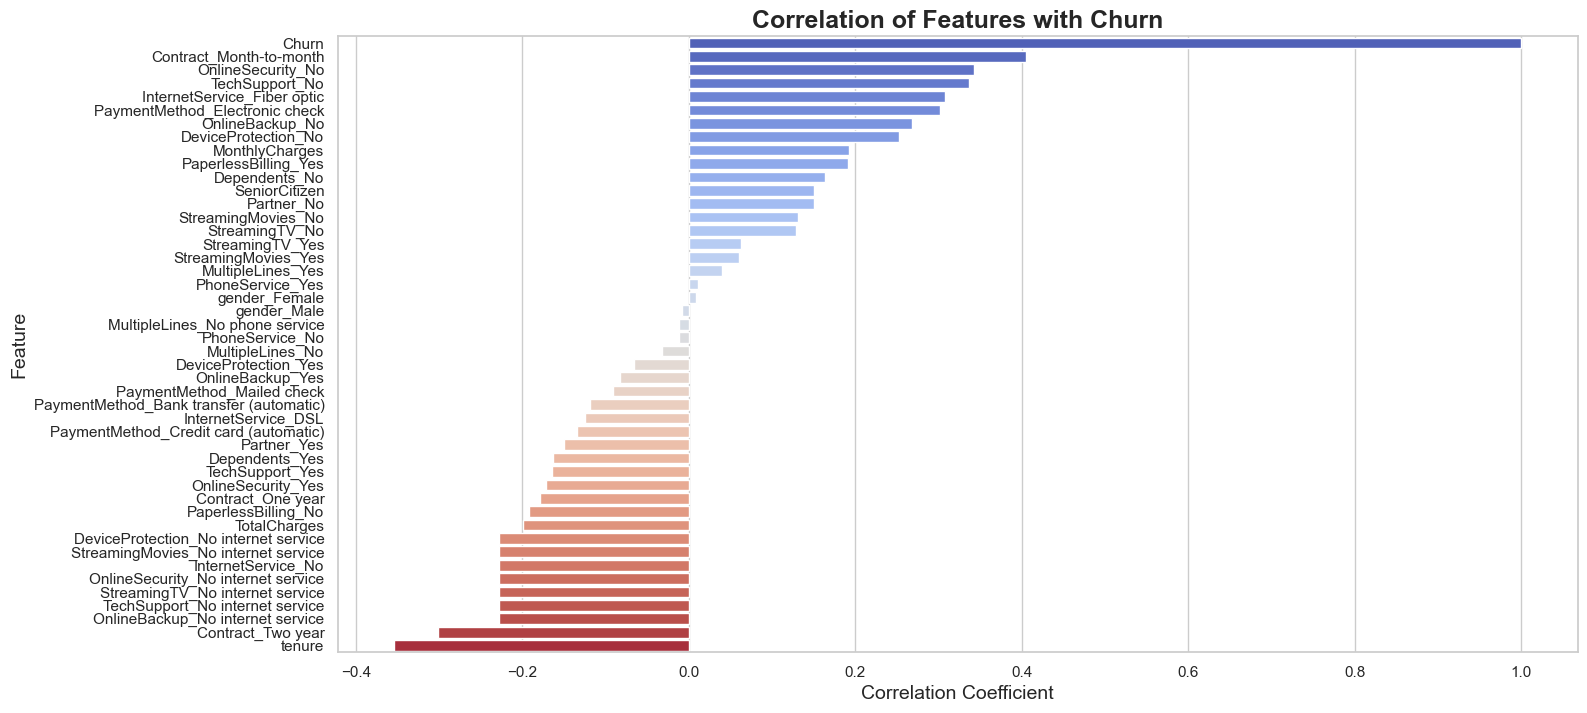

In [ ]:
# Compute correlation
churn_corr = df_dummies.corr()['Churn'].sort_values(ascending=False)

# Plot with seaborn
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=churn_corr.values, y=churn_corr.index, palette='coolwarm')

# Customise the plot
plt.title("Correlation of Features with Churn", fontsize=18, fontweight='bold')
plt.xlabel("Correlation Coefficient", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.show()



- Customers with a **month-to-month contract** are highly positively correlated with churn.
- Lack of **online security**, **tech support**, and **device protection** is also associated with higher churn.
- Features like **two-year contracts**, **senior citizens**, and **having dependents** are negatively correlated with churn.

These insights make intuitive sense that customers with longer commitments and more family responsibilities tend to stay longer, while those with short-term plans and fewer services are more likely to leave.

---

We will explore these patterns further through visualizations below, before moving into modeling and identifying the most important predictors of churn.

